**This lab will focus on ANOVA, inference for variance, and correlation**

# ANOVA Example

Suppose a bank has several branches, and each branch offers personal loans with varying interest rates. We want to understand if the mean interest rates are significantly different across these branches.

Groups for ANOVA: We will compare the mean interest rate offered by different branches. Let's assume the bank has three branches: Branch A, Branch B, and Branch C.

In [1]:
import pandas as pd
import scipy.stats as stats

In [3]:
df = pd.read_csv('banking_interest_rates.csv')
df

,Branch,Interest_Rate
0,Branch A,6.205621
1,Branch A,5.660063
2,Branch A,5.891495
3,Branch A,6.396357
4,Branch A,6.247023
...,...,...
85,Branch C,6.558356
86,Branch C,6.271512
87,Branch C,5.728030
88,Branch C,5.371699


In [4]:
A_interest = df[df['Branch'] == 'Branch A']['Interest_Rate']
B_interest = df[df['Branch'] == 'Branch B']['Interest_Rate']
C_interest = df[df['Branch'] == 'Branch C']['Interest_Rate']

In [5]:
F, p = stats.f_oneway(A_interest,B_interest, C_interest)
F, p

(2.097882588257023, 0.12888111157589846)

Interpret Results:

- If the p-value (p) is less than a significance level (commonly 0.05), it suggests that there are significant differences in the mean interest rates across the branches.
- If p is greater than this threshold, it suggests no significant difference.

So in this case, we can conclude that there is no significant difference between the interst rates of different branches

# Using other package to run ANOVA

In [7]:
df

,Branch,Interest_Rate
0,Branch A,6.205621
1,Branch A,5.660063
2,Branch A,5.891495
3,Branch A,6.396357
4,Branch A,6.247023
...,...,...
85,Branch C,6.558356
86,Branch C,6.271512
87,Branch C,5.728030
88,Branch C,5.371699


In [6]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fitting the ANOVA model
model = ols('Interest_Rate ~ C(Branch)', data=df).fit()

# Performing ANOVA and getting the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Branch),0.666369,2.0,2.097883,0.128881
Residual,13.817291,87.0,NaN,NaN


#### Interpretation:

- **Sum of Squares (Sum_sq):** This column represents the total variation attributed to each source (between branches and within branches).
- **Degrees of Freedom (df):** Reflects the number of levels in the factor (for 'C(Branch)', it's 2, representing the three branches) and the residual degrees of freedom.
- **F value:** This is the calculated statistic for the ANOVA test. A higher F value usually indicates a more significant difference between the group means.
- **p-value (PR(>F)):** The p-value indicates the probability of observing the data if the null hypothesis is true. In this case, the p-value is approximately 0.129.

Since the p-value is greater than the common alpha level of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the mean interest rates offered by the three branches.

#### ols(Interest_Rate ~ C(Branch), data=df).fit

The formula `'Interest_Rate ~ C(Branch)'` used in the context of ANOVA with Python's `statsmodels` library is a way to specify the model being tested. Let's break down its components:

1. **`Interest_Rate`:** This is the dependent variable in the model. It represents the variable whose variation we are trying to explain. In your dataset, 'Interest_Rate' refers to the interest rates offered by different bank branches.

2. **`~`:** This symbol is a separator in the formula and is read as "modeled by". It separates the left-hand side (the dependent variable) from the right-hand side (the independent variable or factors).

3. **`C(Branch)`:** 
   - `Branch` is the independent variable or factor in the model. In this case, it represents the different branches of the bank.
   - The `C()` function is used to indicate that 'Branch' is a categorical variable


# Inference for Variance

## Inference for Variance in a Single Population

A bank wants to assess the consistency of loan approval times across its single branch. The goal is to determine if the variance in approval times is within an acceptable range.

Data Assumptions
- We have a sample of loan approval times (in days) from a single branch.
- The sample size is, let's say, 30.

We will use the Chi-Square test for a single variance, which tests whether the population variance equals a specified value based on a sample variance.

In [1]:
import numpy as np
from scipy.stats import chi2

# Sample data for loan approval times (asuming we have the data)
approval_times = np.array([3, 4, 2, 5, 4, 3, 5, 4, 3, 2, 4, 3, 5, 4, 3, 3, 4, 3, 5, 4, 3, 2, 4, 3, 5, 4, 3, 4, 3, 5])

In [2]:
# Sample variance
sample_variance = np.var(approval_times, ddof=1)

# Assuming a hypothesized population variance
hypothesized_variance = 4

Hypotheses
- Null Hypothesis (H0): The variance of loan approval times is equal to the hypothesized variance (σ² = 4 days²).
- Alternative Hypothesis (H1): The variance of loan approval times is not equal to the hypothesized variance (σ² ≠ 4 days²).

In [3]:
# Chi-square statistic
chi_square_statistic = (len(approval_times) - 1) * sample_variance / hypothesized_variance

In [6]:
chi_square_statistic 

6.241666666666666

In [7]:
# Degrees of freedom
df = len(approval_times) - 1
df

29

In [8]:
# P-value
p_value = chi2.sf(chi_square_statistic, df)

In [9]:
chi_square_statistic, p_value

(6.241666666666666, 0.9999975856768911)

**So what is your conclusion?**

## Inference for Variance in Two Populations

A bank operates two branches and wants to compare the variability in loan approval times between these two branches.

Data Assumptions:
- We have two independent samples of loan approval times from two branches.
- The sample sizes are not necessarily the same.

We will use the F-test for equality of two variances, which compares the variances of two independent samples.

In [10]:
# Sample data for two branches (Let's assume we have such data)
approval_times_branch1 = np.array([3, 4, 5, 2, 4, 5, 3, 4, 5, 3])
approval_times_branch2 = np.array([4, 4, 5, 5, 4, 5, 4, 3, 4, 5, 4, 5])

Hypotheses
- Null Hypothesis (H0): The variances in loan approval times are equal across the two branches (σ₁² = σ₂²).
- Alternative Hypothesis (H1): The variances in loan approval times are not equal across the two branches (σ₁² ≠ σ₂²).

In [11]:
from scipy.stats import f

# Sample variances
variance_branch1 = np.var(approval_times_branch1, ddof=1)
variance_branch2 = np.var(approval_times_branch2, ddof=1)

# F-statistic
F_statistic = variance_branch1 / variance_branch2

# Degrees of freedom for both samples
df1 = len(approval_times_branch1) - 1
df2 = len(approval_times_branch2) - 1

# P-value
p_value = 2 * min(f.cdf(F_statistic, df1, df2), 1 - f.cdf(F_statistic, df1, df2))

F_statistic, p_value

(2.514285714285715, 0.15173516176108715)

The reason why we should use `min` because it is the area of rejection area. This the way that we use to calculate p-value for non-symmetric distribution-based test

## Inference for Variance in >2 Populations

It is complicated!

- Bartlett’s test: Compare the variances of k samples, where k can be more than two samples. The data must be normally distributed. The Levene test is an alternative to the Bartlett test that is less sensitive to departures from normality.
You can follow https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

- Levene’s test: Compare the variances of k samples, where k can be more than two samples. It’s an alternative to the Bartlett’s test that is less sensitive to departures from normality.
You can follow https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html


- Fligner-Killeen test: a non-parametric test which is very robust against departures from normality.
You can follow https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html

# Correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np

In [2]:
df = pd.read_csv('poverty.txt', sep='\t')  # or sep=',' if it's comma-separated

In [3]:
# Using a better column names
df.columns = ["state", "metro_res", "white", "hs_grad", "poverty", "female_house"]

In [4]:
df

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


In [5]:
df.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


## Pairplot for scatter plot and histogram

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


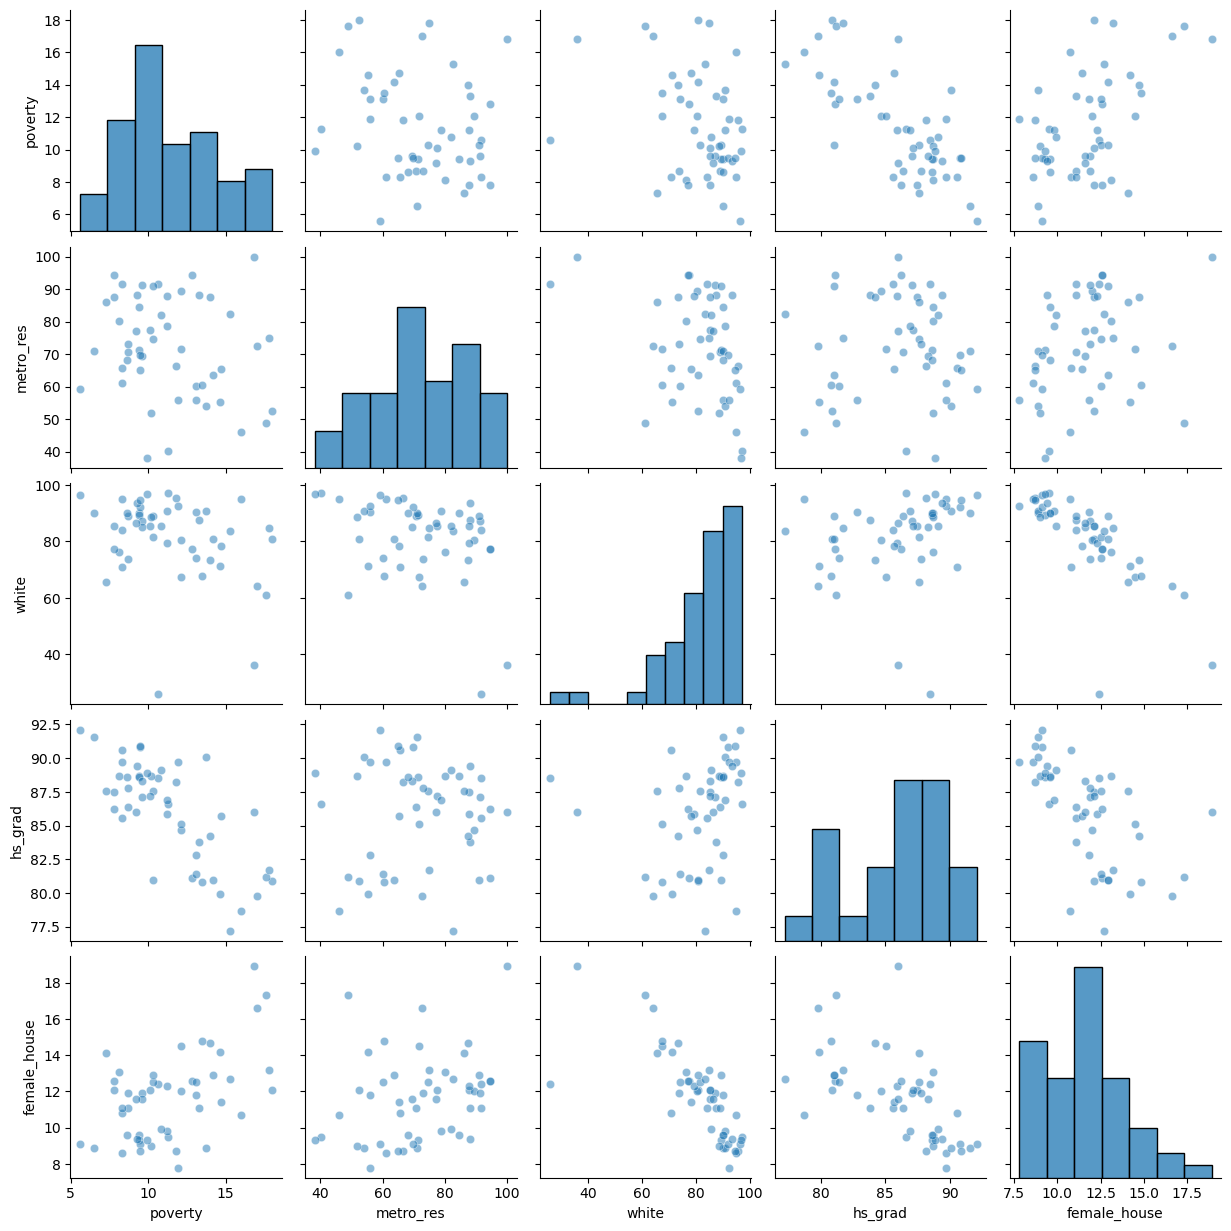

In [6]:
# Plot pairwise relationships in a dataset
sns.pairplot(df, vars=['poverty', 'metro_res', 'white', 'hs_grad', 'female_house'], plot_kws={'alpha': 0.5})
plt.show()

In [7]:
cormat = df.corr(method='pearson', numeric_only=True)
round(cormat,2)

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.00,-0.34,0.02,-0.20,0.30
white,-0.34,1.00,0.24,-0.31,-0.75
hs_grad,0.02,0.24,1.00,-0.75,-0.61
poverty,-0.20,-0.31,-0.75,1.00,0.53
female_house,0.30,-0.75,-0.61,0.53,1.00


## Correlation plot using heatmap

<Axes: >

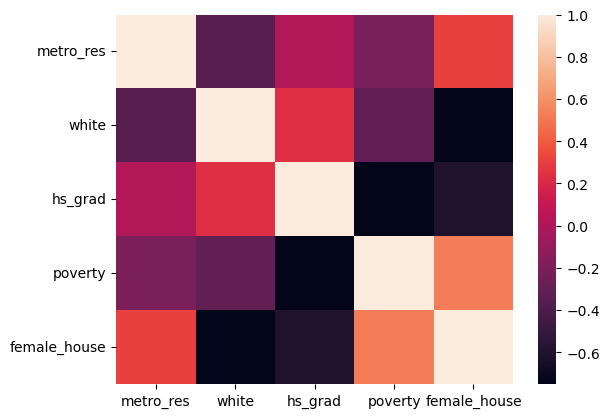

In [8]:
sns.heatmap(cormat)

## Or we can combine these two plots in one

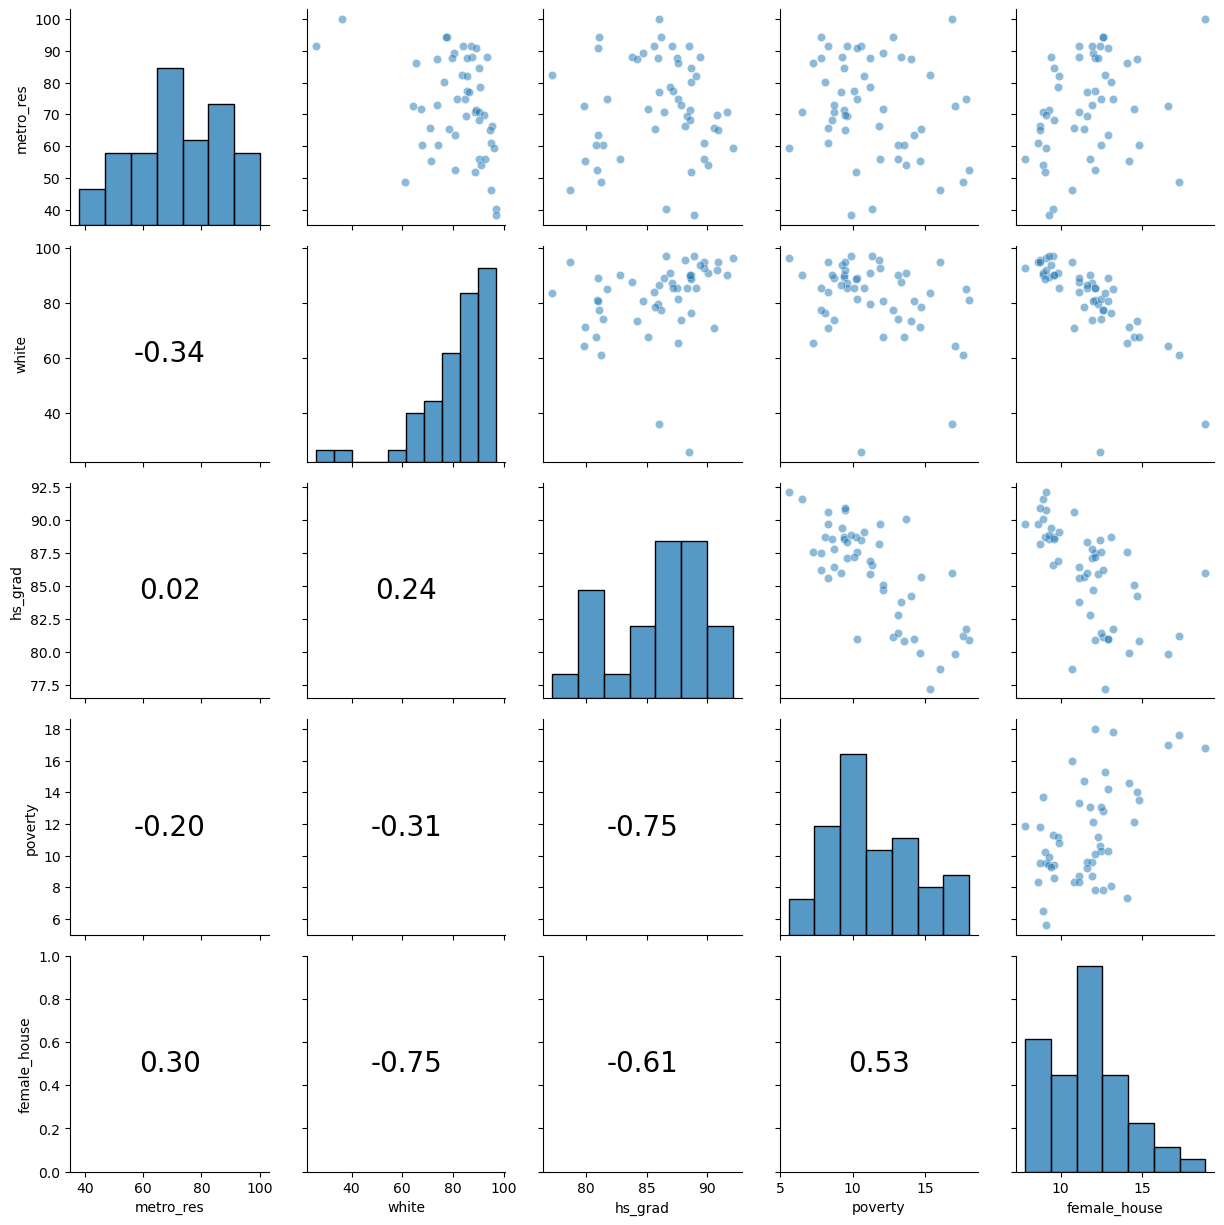

In [9]:
# Initialise the PairGrid
g = sns.PairGrid(df)

# Map the scatter plot to the upper triangle
g.map_upper(sns.scatterplot, alpha=0.5)

# Map the correlation coefficient to the lower triangle
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = f"{coef:.2f}"
    ax = plt.gca()
    ax.annotate(label, xy=(.5, .5), xycoords=ax.transAxes, 
                size=20, ha='center', va='center')

g.map_lower(corr)

# To just put histograms on the diagonal, you can use g.map_diag
g.map_diag(sns.histplot)
# plt.savefig('scatter_corr_plot.png')
plt.show()

If you don't like histogram, then

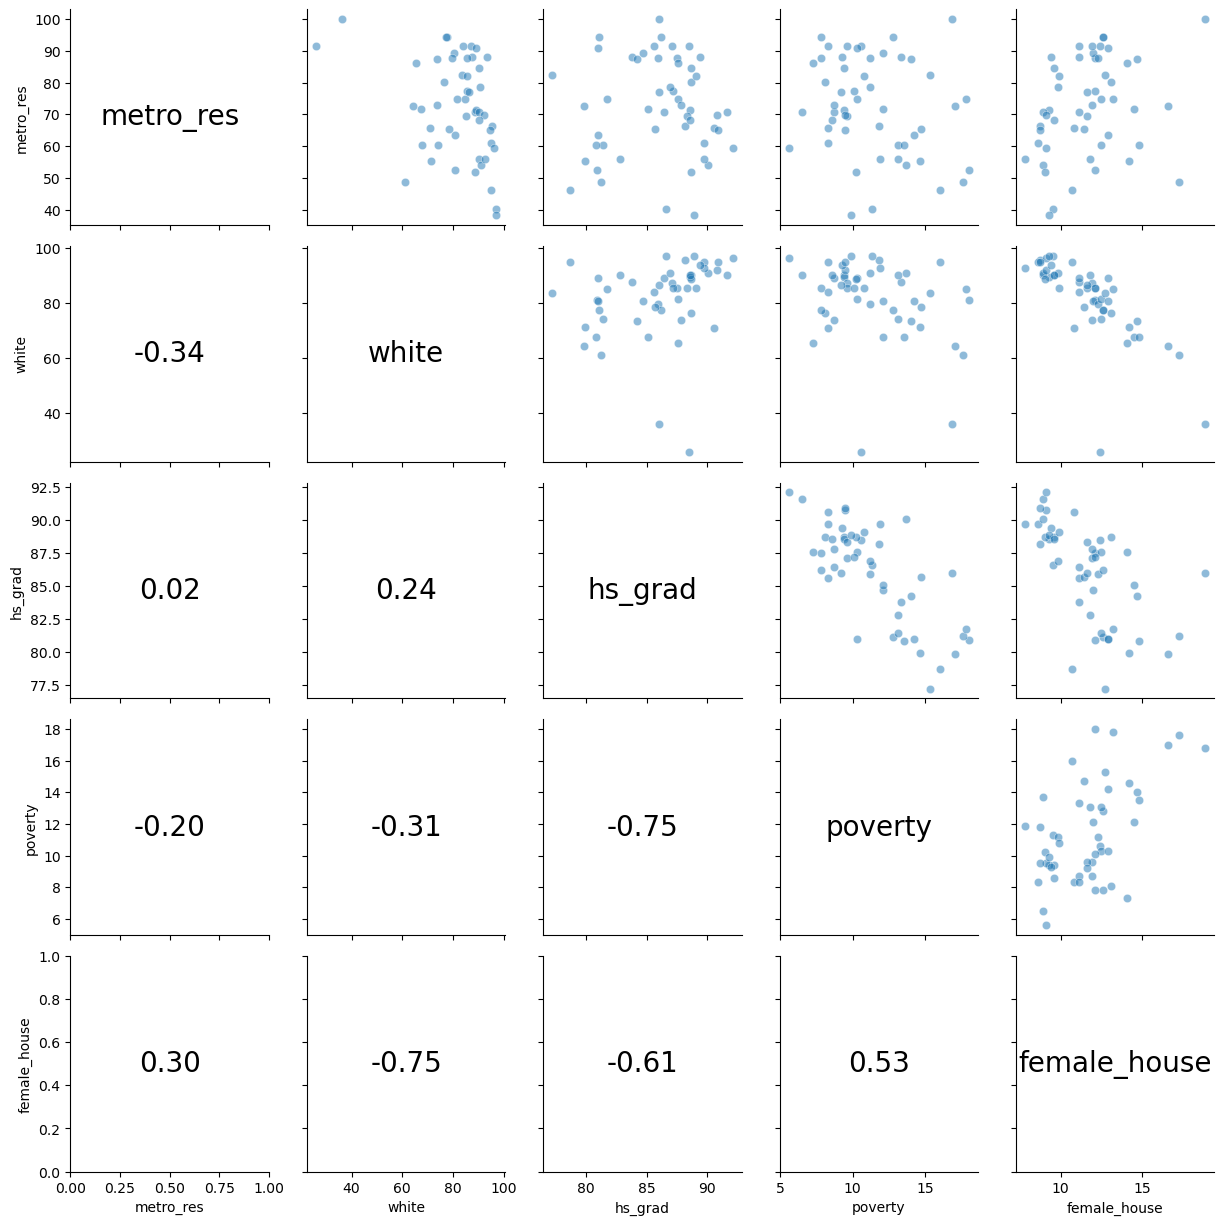

In [10]:
# Initialise the PairGrid
g = sns.PairGrid(df)

# Map the scatter plot to the upper triangle
g.map_upper(sns.scatterplot, alpha=0.5)

# Map the correlation coefficient to the lower triangle
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = f"{coef:.2f}"
    ax = plt.gca()
    ax.annotate(label, xy=(.5, .5), xycoords=ax.transAxes, 
                size=20, ha='center', va='center')

g.map_lower(corr)

# Define a function to plot the variable names on the diagonal
def label_diag(x, **kwargs):
    ax = plt.gca()
    ax.annotate(x.name, xy=(0.5, 0.5), xycoords=ax.transAxes,
                size=20, ha='center', va='center')

# Map the variable names to the diagonal
g.map_diag(label_diag)

# plt.savefig('scatter_corr_diag.png')
plt.show()